In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [140]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews_data = []

# Loop through the pages
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Extract reviews, verification status, and dates
    for review in parsed_content.find_all("div", {"class": "text_content"}):
        # Extract the review text
        review_text = review.get_text().strip()

        # Extract verification status (Check if a specific indicator exists in the review)
        verification_status = "Verified" if "✅ Trip Verified" in review_text else "Not Verified"

        # Find the review date (within <time> tag with itemprop="datePublished")
        date_tag = review.find_previous("time", {"itemprop": "datePublished"})
        if date_tag:
            review_date = date_tag.get_text().strip()
        else:
            review_date = "Unknown"  # Handle cases where no date is found
        
        # Append to the reviews_data list
        reviews_data.append({
            "review_text": review_text,
            "verification_status": verification_status,
            "review_date": review_date
        })
    
    print(f"   ---> {len(reviews_data)} total reviews")

# Convert the collected data into a DataFrame for better organization
df_reviews = pd.DataFrame(reviews_data)

# Show first few rows to verify
print(df_reviews.head())


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [131]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,{'review_text': 'Not Verified | Very good ser...
1,{'review_text': '✅ Trip Verified | Flight ma...
2,{'review_text': '✅ Trip Verified | Another a...
3,{'review_text': '✅ Trip Verified | The servi...
4,{'review_text': '✅ Trip Verified | This flig...


In [142]:
df_reviews

,review_text,verification_status,review_date
0,Not Verified | Very good service on this rout...,Not Verified,31st March 2025
1,✅ Trip Verified | Flight mainly let down by ...,Verified,19th March 2025
2,✅ Trip Verified | Another awful experience b...,Verified,16th March 2025
3,"✅ Trip Verified | The service was rude, full...",Verified,16th March 2025
4,✅ Trip Verified | This flight was a joke. Th...,Verified,16th March 2025
...,...,...,...
3920,Flew LHR - VIE return operated by bmi but BA a...,Not Verified,29th August 2012
3921,LHR to HAM. Purser addresses all club passenge...,Not Verified,28th August 2012
3922,My son who had worked for British Airways urge...,Not Verified,12th October 2011
3923,London City-New York JFK via Shannon on A318 b...,Not Verified,11th October 2011


In [144]:
df_reviews.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [146]:
df= pd.read_csv("BA_reviews.csv", index_col=False)

In [152]:
# Extracting verification status and cleaning reviews
df["verification_status"] = df["review_text"].str.extract(r"^(✅ Trip Verified \||Not Verified \|)")
df["verification_status"] = df["verification_status"].str.replace(r" \|", "", regex=True)  # Clean up extracted text

In [154]:
# Cleaning the reviews column
df["review_text"] = df["review_text"].str.replace(r"^(✅ Trip Verified \||Not Verified \|)", "", regex=True).str.strip()

In [156]:
df

,Unnamed: 0,review_text,verification_status,review_date
0,0,Very good service on this route BA2710 30th Ma...,Not Verified,31st March 2025
1,1,Flight mainly let down by a disagreeable fligh...,✅ Trip Verified,19th March 2025
2,2,Another awful experience by British Airways. T...,✅ Trip Verified,16th March 2025
3,3,"The service was rude, full of attitude to me, ...",✅ Trip Verified,16th March 2025
4,4,This flight was a joke. There was four people ...,✅ Trip Verified,16th March 2025
...,...,...,...,...
3920,3920,Flew LHR - VIE return operated by bmi but BA a...,NaN,29th August 2012
3921,3921,LHR to HAM. Purser addresses all club passenge...,NaN,28th August 2012
3922,3922,My son who had worked for British Airways urge...,NaN,12th October 2011
3923,3923,London City-New York JFK via Shannon on A318 b...,NaN,11th October 2011


In [158]:
# Drop the unnecessary index column
df = df.drop(columns=["Unnamed: 0"])

In [160]:
df.head()

,review_text,verification_status,review_date
0,Very good service on this route BA2710 30th Ma...,Not Verified,31st March 2025
1,Flight mainly let down by a disagreeable fligh...,✅ Trip Verified,19th March 2025
2,Another awful experience by British Airways. T...,✅ Trip Verified,16th March 2025
3,"The service was rude, full of attitude to me, ...",✅ Trip Verified,16th March 2025
4,This flight was a joke. There was four people ...,✅ Trip Verified,16th March 2025


In [162]:
# Replace NaN values in "verification_status" with "Unknown"
df["verification_status"].fillna("Unknown", inplace=True)

# Verify the changes
df.isna().sum()

review_text            0
verification_status    0
review_date            0
dtype: int64

In [164]:
df

,review_text,verification_status,review_date
0,Very good service on this route BA2710 30th Ma...,Not Verified,31st March 2025
1,Flight mainly let down by a disagreeable fligh...,✅ Trip Verified,19th March 2025
2,Another awful experience by British Airways. T...,✅ Trip Verified,16th March 2025
3,"The service was rude, full of attitude to me, ...",✅ Trip Verified,16th March 2025
4,This flight was a joke. There was four people ...,✅ Trip Verified,16th March 2025
...,...,...,...
3920,Flew LHR - VIE return operated by bmi but BA a...,Unknown,29th August 2012
3921,LHR to HAM. Purser addresses all club passenge...,Unknown,28th August 2012
3922,My son who had worked for British Airways urge...,Unknown,12th October 2011
3923,London City-New York JFK via Shannon on A318 b...,Unknown,11th October 2011


In [67]:
pip install textblob

In [91]:
pip install nltk pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [166]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to reviews
df["cleaned_reviews"] = df["review_text"].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amitk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amitk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amitk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [168]:
df

,review_text,verification_status,review_date,cleaned_reviews
0,Very good service on this route BA2710 30th Ma...,Not Verified,31st March 2025,good service route ba th march cabin crew work...
1,Flight mainly let down by a disagreeable fligh...,✅ Trip Verified,19th March 2025,flight mainly let disagreeable flight attendan...
2,Another awful experience by British Airways. T...,✅ Trip Verified,16th March 2025,another awful experience british airway flight...
3,"The service was rude, full of attitude to me, ...",✅ Trip Verified,16th March 2025,service rude full attitude food poorly service...
4,This flight was a joke. There was four people ...,✅ Trip Verified,16th March 2025,flight joke four people business class includi...
...,...,...,...,...
3920,Flew LHR - VIE return operated by bmi but BA a...,Unknown,29th August 2012,flew lhr vie return operated bmi ba aircraft a...
3921,LHR to HAM. Purser addresses all club passenge...,Unknown,28th August 2012,lhr ham purser address club passenger name boa...
3922,My son who had worked for British Airways urge...,Unknown,12th October 2011,son worked british airway urged fly british ai...
3923,London City-New York JFK via Shannon on A318 b...,Unknown,11th October 2011,london citynew york jfk via shannon really nic...


In [170]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text).sentiment.polarity
    if analysis > 0:
        return "positive"
    elif analysis < 0:
        return "negative"
    else:
        return "neutral"

df["sentiment"] = df["cleaned_reviews"].apply(get_sentiment)

In [172]:
df["sentiment"]

0       negative
1       positive
2       negative
3       negative
4       negative
          ...   
3920    positive
3921    positive
3922    positive
3923    positive
3924    negative
Name: sentiment, Length: 3925, dtype: object

In [174]:
df

,review_text,verification_status,review_date,cleaned_reviews,sentiment
0,Very good service on this route BA2710 30th Ma...,Not Verified,31st March 2025,good service route ba th march cabin crew work...,negative
1,Flight mainly let down by a disagreeable fligh...,✅ Trip Verified,19th March 2025,flight mainly let disagreeable flight attendan...,positive
2,Another awful experience by British Airways. T...,✅ Trip Verified,16th March 2025,another awful experience british airway flight...,negative
3,"The service was rude, full of attitude to me, ...",✅ Trip Verified,16th March 2025,service rude full attitude food poorly service...,negative
4,This flight was a joke. There was four people ...,✅ Trip Verified,16th March 2025,flight joke four people business class includi...,negative
...,...,...,...,...,...
3920,Flew LHR - VIE return operated by bmi but BA a...,Unknown,29th August 2012,flew lhr vie return operated bmi ba aircraft a...,positive
3921,LHR to HAM. Purser addresses all club passenge...,Unknown,28th August 2012,lhr ham purser address club passenger name boa...,positive
3922,My son who had worked for British Airways urge...,Unknown,12th October 2011,son worked british airway urged fly british ai...,positive
3923,London City-New York JFK via Shannon on A318 b...,Unknown,11th October 2011,london citynew york jfk via shannon really nic...,positive


In [83]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [176]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [178]:
# Convert text into numerical data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["cleaned_reviews"])
y = df["sentiment"]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
# Train Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [184]:
y_pred = model.predict(X_test)

In [186]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7401273885350318
              precision    recall  f1-score   support

    negative       0.77      0.18      0.29       228
     neutral       0.00      0.00      0.00         4
    positive       0.74      0.98      0.84       553

    accuracy                           0.74       785
   macro avg       0.50      0.38      0.38       785
weighted avg       0.74      0.74      0.68       785



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
new_reviews = ["This flight was amazing!", "Worst experience ever."]
new_reviews_cleaned = [preprocess_text(review) for review in new_reviews]
new_reviews_tfidf = vectorizer.transform(new_reviews_cleaned)
new_predictions = model.predict(new_reviews_tfidf)

print("Predictions for new reviews:", new_predictions)

Predictions for new reviews: ['positive' 'negative']


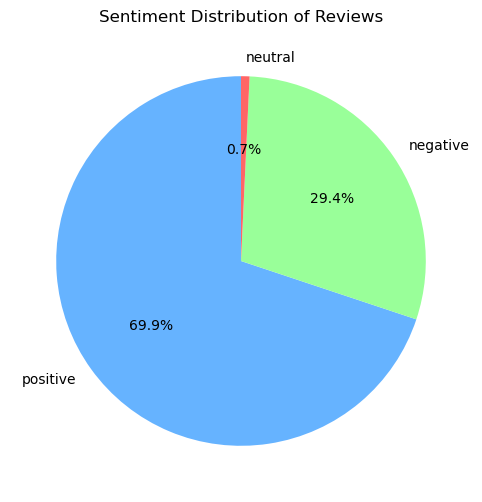

In [190]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ff6666'])
plt.title('Sentiment Distribution of Reviews')
plt.ylabel('')  # Remove ylabel for clarity
plt.show()

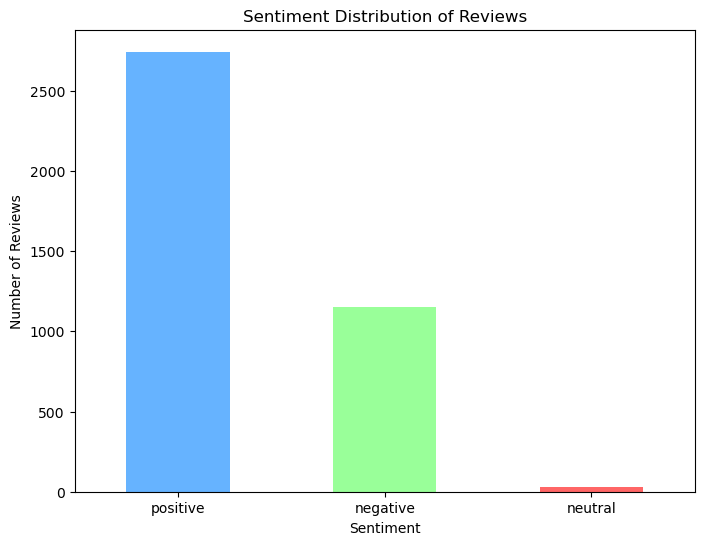

In [192]:
# Plot the sentiment distribution as a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['#66b3ff', '#99ff99', '#ff6666'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


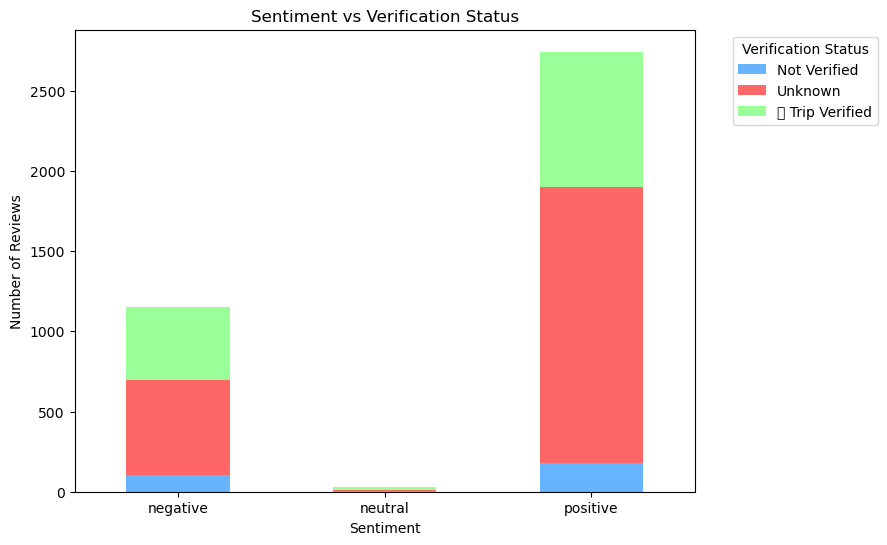

In [194]:
# Create a cross-tabulation of sentiment vs. verification status
sentiment_verification = pd.crosstab(df['sentiment'], df['verification_status'])

# stacked bar chart
sentiment_verification.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#66b3ff', '#ff6666', '#99ff99'])
plt.title('Sentiment vs Verification Status')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Verification Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


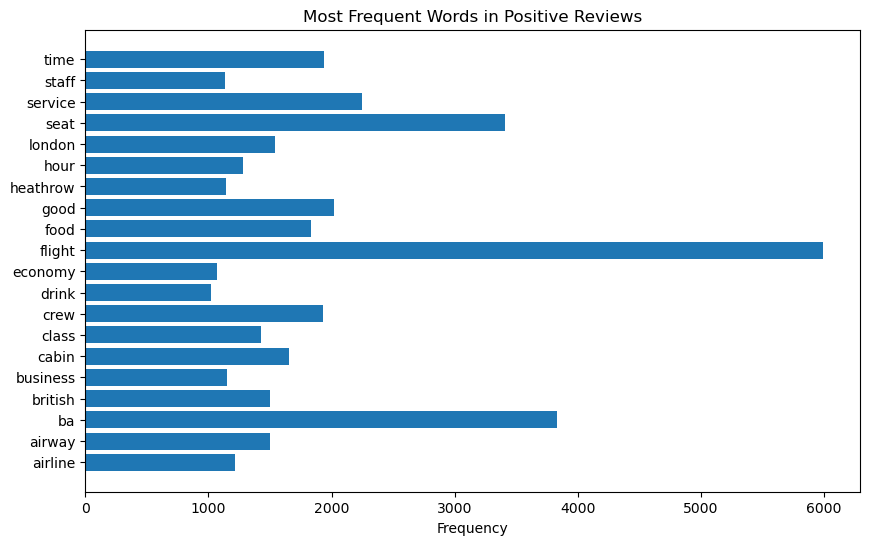

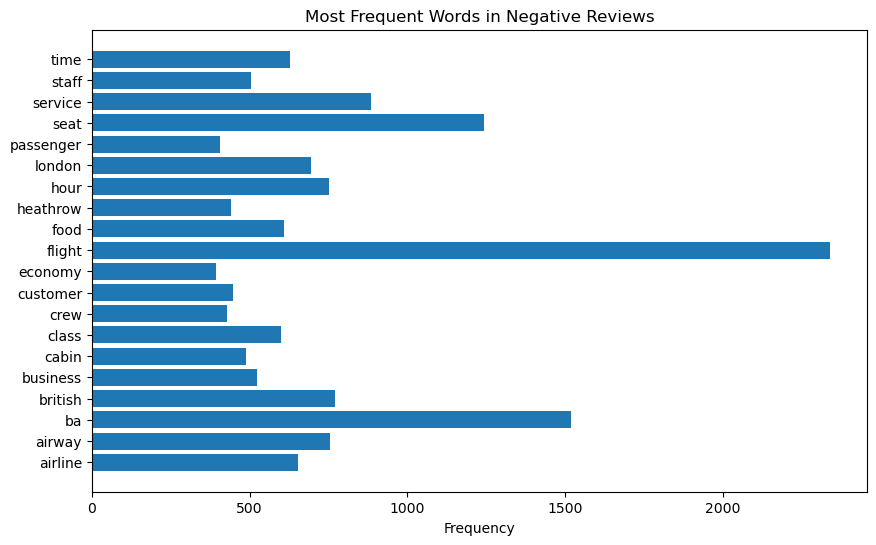

In [203]:
from sklearn.feature_extraction.text import CountVectorizer

# Define a function to plot most frequent words for each sentiment
def plot_most_frequent_words(df, sentiment):
    reviews = ' '.join(df[df['sentiment'] == sentiment]['cleaned_reviews'])
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    word_counts = vectorizer.fit_transform([reviews]).toarray()
    words = vectorizer.get_feature_names_out()
    
    # Create a bar chart for the most frequent words
    plt.figure(figsize=(10, 6))
    plt.barh(words, word_counts.flatten())
    plt.xlabel('Frequency')
    plt.title(f'Most Frequent Words in {sentiment.capitalize()} Reviews')
    plt.show()

# Plot frequent words for positive sentiment
plot_most_frequent_words(df, 'positive')

# Plot frequent words for negative sentiment
plot_most_frequent_words(df, 'negative')

In [240]:
#pip install wordcloud
from wordcloud import WordCloud

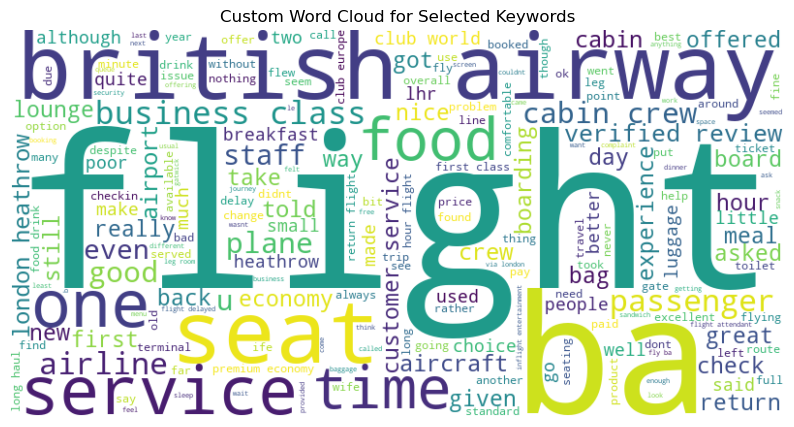

In [242]:
# Custom list of important words to focus on (e.g., product-specific)
keywords = ['service', 'food', 'delay', 'support']

# Filter reviews containing any of these keywords
keyword_reviews = df[df['cleaned_reviews'].str.contains('|'.join(keywords))]

# Generate a word cloud for these keyword-specific reviews
keyword_reviews_text = ' '.join(keyword_reviews['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keyword_reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Custom Word Cloud for Selected Keywords')
plt.axis('off')
plt.show()

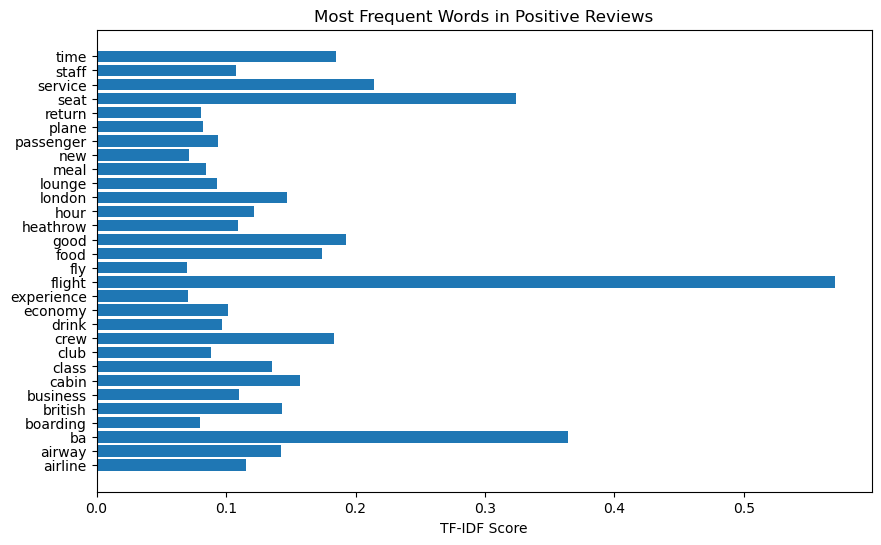

Top words in Positive reviews: ['airline' 'airway' 'ba' 'boarding' 'british' 'business' 'cabin' 'class'
 'club' 'crew' 'drink' 'economy' 'experience' 'flight' 'fly' 'food' 'good'
 'heathrow' 'hour' 'london' 'lounge' 'meal' 'new' 'passenger' 'plane'
 'return' 'seat' 'service' 'staff' 'time']


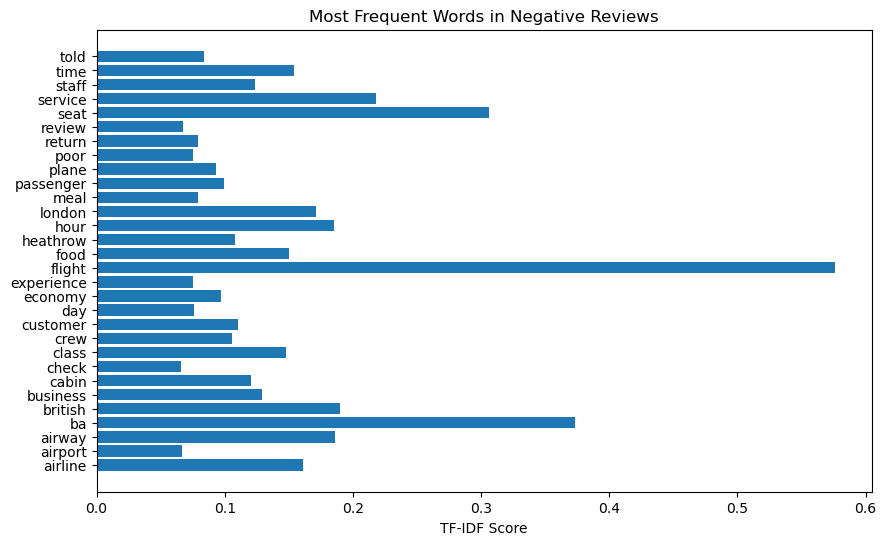

Top words in Negative reviews: ['airline' 'airport' 'airway' 'ba' 'british' 'business' 'cabin' 'check'
 'class' 'crew' 'customer' 'day' 'economy' 'experience' 'flight' 'food'
 'heathrow' 'hour' 'london' 'meal' 'passenger' 'plane' 'poor' 'return'
 'review' 'seat' 'service' 'staff' 'time' 'told']


In [248]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Custom stopwords (excluding frequent neutral words)
custom_stopwords = ['flight', 'airline', 'seat', 'service', 'passenger', 'crew', 'airport', 'plane']

# Define a function to plot most frequent words for each sentiment
def plot_most_frequent_words(df, sentiment, use_tfidf=True):
    reviews = ' '.join(df[df['sentiment'] == sentiment]['cleaned_reviews'])
    
    # Choose TF-IDF or CountVectorizer
    if use_tfidf:
        vectorizer = TfidfVectorizer(stop_words='english', max_features=30)
    else:
        vectorizer = CountVectorizer(stop_words='english', max_features=30)

    word_counts = vectorizer.fit_transform([reviews]).toarray()
    words = vectorizer.get_feature_names_out()
    
    # Create a bar chart for the most frequent words
    plt.figure(figsize=(10, 6))
    plt.barh(words, word_counts.flatten())
    plt.xlabel('Frequency' if not use_tfidf else 'TF-IDF Score')
    plt.title(f'Most Frequent Words in {sentiment.capitalize()} Reviews')
    plt.show()

    # Print the top words for debugging
    print(f"Top words in {sentiment.capitalize()} reviews: {words}")

# Plot frequent words for positive sentiment
plot_most_frequent_words(df, 'positive', use_tfidf=True)

# Plot frequent words for negative sentiment
plot_most_frequent_words(df, 'negative', use_tfidf=True)


In [258]:
# Function to remove ordinal suffixes
def clean_date(date_str):
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)  # Remove 'st', 'nd', 'rd', 'th'

# Apply the function to clean the date column
df['review_date'] = df['review_date'].astype(str).apply(clean_date)

# Convert to datetime
df['review_date'] = pd.to_datetime(df['review_date'], format='%d %B %Y', errors='coerce')

# Check if there are any NaT values
print(df['review_date'].isna().sum(), "NaT values found")

0 NaT values found


In [260]:
df

,review_text,verification_status,review_date,cleaned_reviews,sentiment,sentiment_numeric
0,Very good service on this route BA2710 30th Ma...,Not Verified,2025-03-31,good service route ba th march cabin crew work...,negative,-1
1,Flight mainly let down by a disagreeable fligh...,✅ Trip Verified,2025-03-19,flight mainly let disagreeable flight attendan...,positive,1
2,Another awful experience by British Airways. T...,✅ Trip Verified,2025-03-16,another awful experience british airway flight...,negative,-1
3,"The service was rude, full of attitude to me, ...",✅ Trip Verified,2025-03-16,service rude full attitude food poorly service...,negative,-1
4,This flight was a joke. There was four people ...,✅ Trip Verified,2025-03-16,flight joke four people business class includi...,negative,-1
...,...,...,...,...,...,...
3920,Flew LHR - VIE return operated by bmi but BA a...,Unknown,2012-08-29,flew lhr vie return operated bmi ba aircraft a...,positive,1
3921,LHR to HAM. Purser addresses all club passenge...,Unknown,2012-08-28,lhr ham purser address club passenger name boa...,positive,1
3922,My son who had worked for British Airways urge...,Unknown,2011-10-12,son worked british airway urged fly british ai...,positive,1
3923,London City-New York JFK via Shannon on A318 b...,Unknown,2011-10-11,london citynew york jfk via shannon really nic...,positive,1


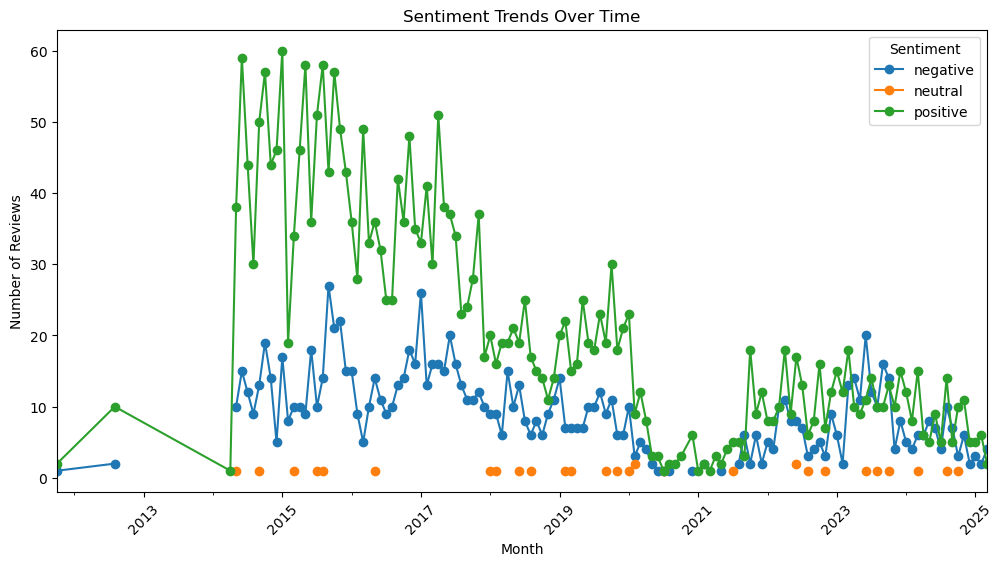

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the Review_date column is in datetime format
df['review_date'] = pd.to_datetime(df['review_date'])

# Extract year and month
df['YearMonth'] = df['review_date'].dt.to_period('M')

# Count reviews per sentiment each month
sentiment_trend = df.groupby(['YearMonth', 'sentiment']).size().unstack()

# Plot
sentiment_trend.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Trends Over Time")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()

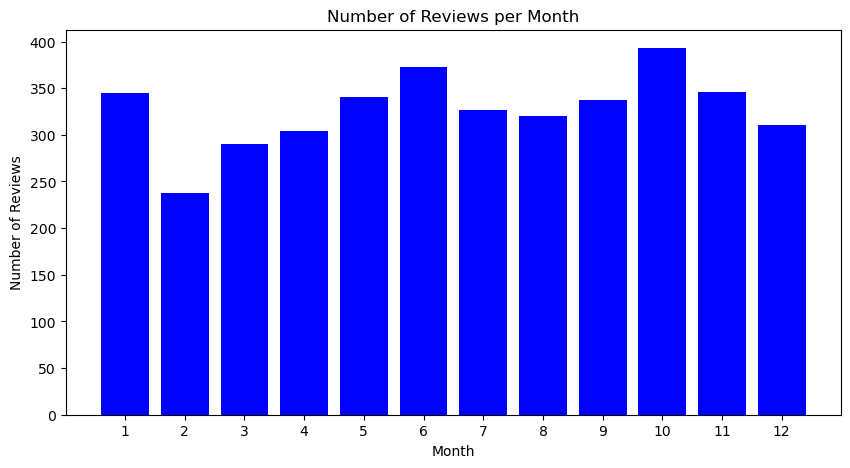

In [267]:
df['Month'] = df['review_date'].dt.month  # Extract month
month_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(month_counts.index, month_counts.values, color='blue')
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per Month")
plt.xticks(range(1, 13))
plt.show()


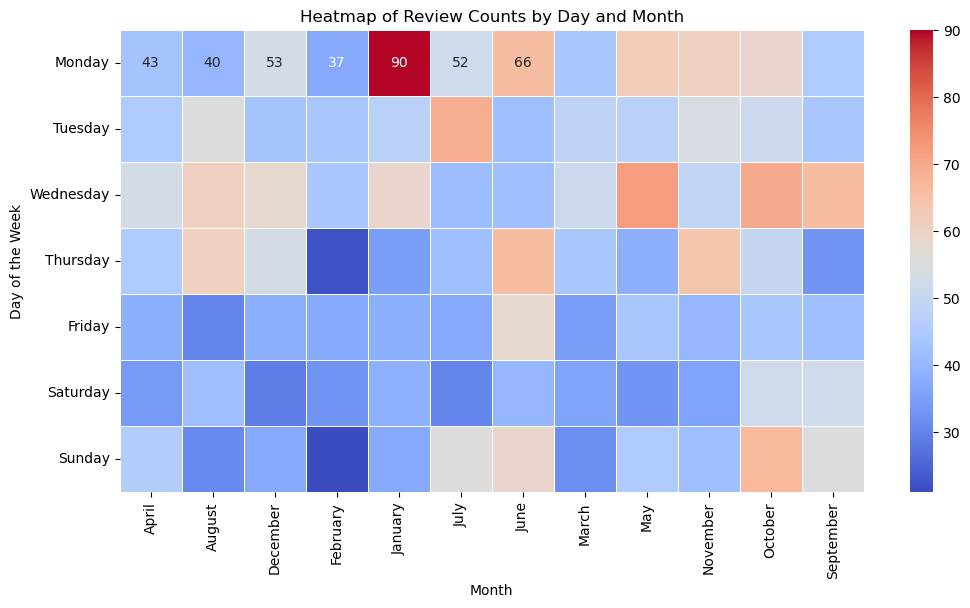

In [269]:
df['Weekday'] = df['review_date'].dt.day_name()  # Extract day of the week
df['Month'] = df['review_date'].dt.month_name()  # Extract month name

# Aggregate review counts
heatmap_data = df.pivot_table(index='Weekday', columns='Month', values='sentiment', aggfunc='count')

# Reorder days of the week
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Month")
plt.ylabel("Day of the Week")
plt.title("Heatmap of Review Counts by Day and Month")
plt.show()


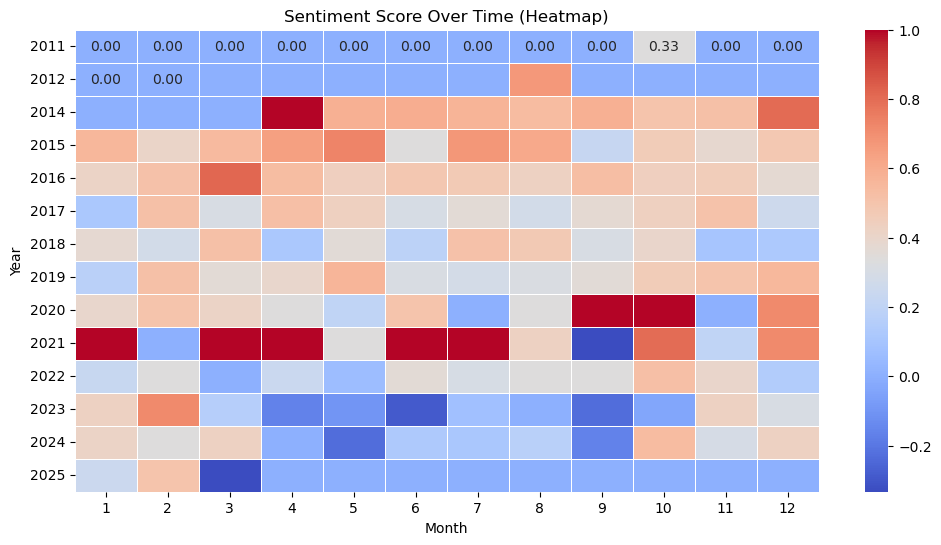

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Review_date is in datetime format
df['review_date'] = pd.to_datetime(df['review_date'])

# Extract Year and Month
df['Year'] = df['review_date'].dt.year
df['Month'] = df['review_date'].dt.month

# Assign sentiment score: Positive = 1, Negative = -1
if 'sentiment_score' not in df.columns:
    df['sentiment_score'] = df['sentiment'].map({'positive': 1, 'negative': -1})

# Aggregate average sentiment score per month-year
heatmap_data = df.pivot_table(index='Year', columns='Month', values='sentiment_score', aggfunc='mean')

# Replace NaN values with 0 or another neutral value
heatmap_data = heatmap_data.fillna(0)  # Or use .fillna(heatmap_data.mean()) if you prefer averaging missing values

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Sentiment Score Over Time (Heatmap)")
plt.show()